In [61]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
rcParams['figure.figsize'] = 80,50

In [106]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [107]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [116]:
# imagesTrain.iloc[:,3:300]

In [119]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain)
imagesTest_scaled = scaler.transform(imagesTest)

imagesTrain_scaled = pd.DataFrame(imagesTrain_scaled) 
imagesTest_scaled = pd.DataFrame(imagesTest_scaled)

In [77]:
#PCA conversion
# pca = PCA(n_components = 200)

# imagesTrain_pca = pca.fit_transform(imagesTrain_scaled)
# imagesTest_pca = pca.transform(imagesTest_scaled)

# imagesTrain_pca = pd.DataFrame(imagesTrain_pca) 
# imagesTest_pca = pd.DataFrame(imagesTest_pca) 

In [103]:
# pca.explained_variance_ratio_.sum()


In [122]:
imagesTrain_scaled.iloc[:,21000:38000]

,21000,21001,21002,21003,21004,21005,21006,21007,21008,21009,...,37990,37991,37992,37993,37994,37995,37996,37997,37998,37999
0,0.596078,0.721569,0.600000,0.572549,0.666667,0.792157,0.435294,0.686275,0.505882,0.505882,...,0.043137,0.070588,0.031373,0.082353,0.070588,0.039216,0.054902,0.070588,0.109804,0.062745
1,0.282353,0.313725,0.298039,0.298039,0.172549,0.176471,0.184314,0.192157,0.200000,0.207843,...,0.474510,0.443137,0.400000,0.376471,0.368627,0.372549,0.368627,0.360784,0.349020,0.345098
2,0.462745,0.462745,0.443137,0.443137,0.517647,0.501961,0.478431,0.458824,0.447059,0.443137,...,0.329412,0.337255,0.349020,0.360784,0.407843,0.443137,0.490196,0.513725,0.505882,0.486275
3,0.019608,0.023529,0.039216,0.039216,0.486275,0.709804,0.411765,0.682353,0.250980,0.654902,...,0.592157,0.509804,0.796078,0.658824,0.709804,0.698039,0.686275,0.682353,0.698039,0.717647
4,0.721569,0.725490,0.733333,0.733333,0.929412,0.909804,0.894118,0.890196,0.890196,0.874510,...,0.243137,0.258824,0.274510,0.286275,0.298039,0.309804,0.329412,0.356863,0.396078,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.105882,0.121569,0.098039,0.125490,0.101961,0.086275,0.101961,0.086275,0.019608,0.015686
4996,0.992157,0.992157,0.992157,0.992157,0.839216,0.847059,0.858824,0.870588,0.878431,0.882353,...,0.007843,0.011765,0.023529,0.035294,0.043137,0.054902,0.074510,0.098039,0.105882,0.086275
4997,0.580392,0.572549,0.564706,0.564706,0.470588,0.470588,0.470588,0.474510,0.474510,0.478431,...,0.156863,0.247059,0.317647,0.380392,0.454902,0.501961,0.541176,0.545098,0.545098,0.564706
4998,0.384314,0.356863,0.435294,0.447059,0.321569,0.325490,0.333333,0.345098,0.356863,0.356863,...,0.525490,0.521569,0.513725,0.513725,0.521569,0.517647,0.533333,0.517647,0.490196,0.509804


In [123]:
labelsTrain['smiling'][21000:38000]

Series([], Name: smiling, dtype: int32)

In [125]:
model = tree.DecisionTreeClassifier(max_depth=5 ,criterion = 'gini')
model.fit(imagesTrain_scaled.iloc[:,21000:38000],labelsTrain['smiling'])
model.score(imagesTest_scaled.iloc[:,21000:38000],labelsTest['smiling'])

0.814

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [95]:
hyper_params = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7,None]
}

In [96]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [97]:
grid.fit(imagesTrain_pca,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [98]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

[Text(0.5, 0.9166666666666666, 'X[31955] <= 0.542\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.75, 'X[26984] <= 0.367\ngini = 0.411\nsamples = 2450\nvalue = [1741, 709]'),
 Text(0.125, 0.5833333333333334, 'X[31424] <= 0.355\ngini = 0.5\nsamples = 966\nvalue = [490, 476]'),
 Text(0.0625, 0.4166666666666667, 'X[24455] <= 0.298\ngini = 0.369\nsamples = 442\nvalue = [334, 108]'),
 Text(0.03125, 0.25, 'X[23557] <= 0.308\ngini = 0.481\nsamples = 82\nvalue = [33, 49]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.287\nsamples = 46\nvalue = [8, 38]'),
 Text(0.09375, 0.25, 'X[32311] <= 0.347\ngini = 0.274\nsamples = 360\nvalue = [301, 59]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.212\nsamples = 315\nvalue = [277, 38]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.498\nsamples = 45\nvalue = [24, 21]'),
 Text(0.1875, 0.4166666666666667, 'X[25697] <= 0.571\ngini = 0.418\nsample

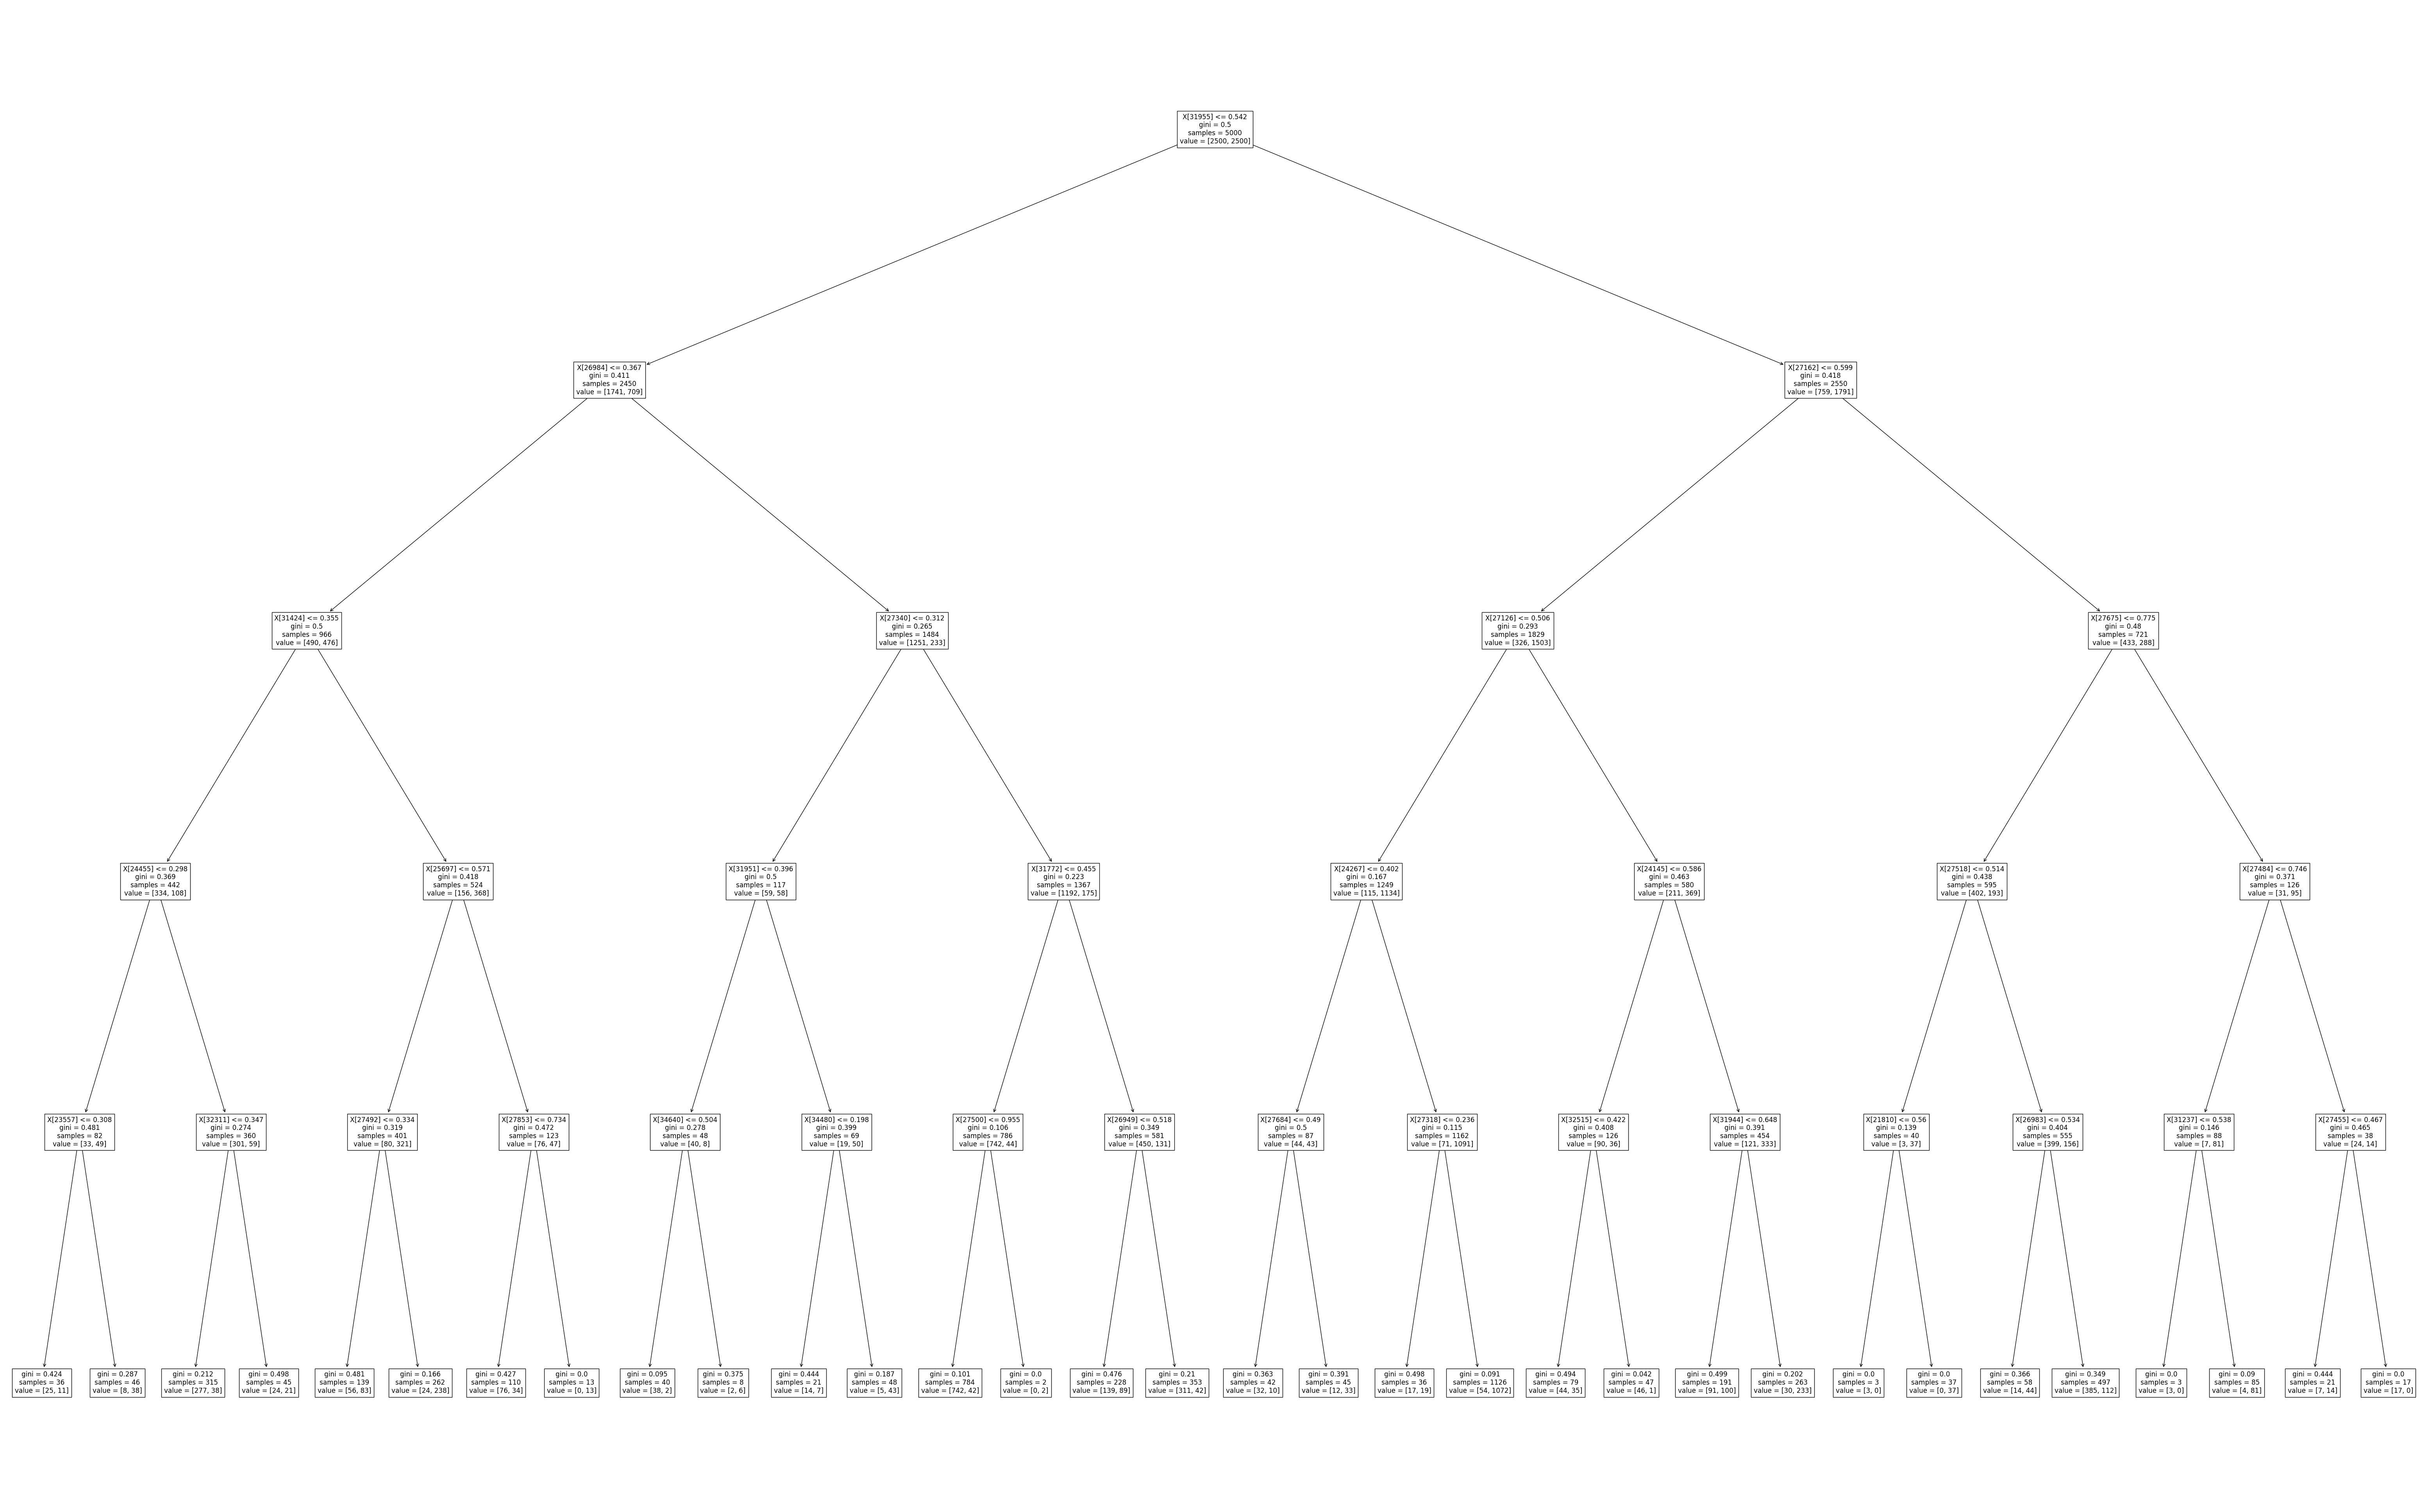

In [105]:
plot_tree(model)